In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from numpy import absolute
from numpy import mean
from numpy import std
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold,KFold

In [56]:
df = pd.read_csv("/home/ayush/Documents/Train.csv")
df

,id,asset_id,open,high,low,volume,market_cap,url_shares,unique_url_shares,reddit_posts,...,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,social_score_24h_rank,medium,youtube,social_volume,percent_change_24h,market_cap_global,close
0,ID_322qz6,1,9422.849081,9428.490628,9422.849081,7.131986e+08,1.737635e+11,1689.0,817.0,55.0,...,606.0,2.0,1.0,1.0,2.0,5.0,4422,1.434516,2.818066e+11,9428.279323
1,ID_3239o9,1,7985.359278,7992.059917,7967.567267,4.004755e+08,1.426942e+11,920.0,544.0,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2159,-2.459507,2.126897e+11,7967.567267
2,ID_323J9k,1,49202.033778,49394.593518,49068.057046,3.017729e+09,9.166977e+11,1446.0,975.0,72.0,...,692.0,3.0,1.0,1.0,NaN,NaN,10602,4.942448,1.530712e+12,49120.738484
3,ID_323y5P,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,285,NaN,NaN,NaN
4,ID_324kJH,1,10535.737119,10535.737119,10384.798216,1.150053e+09,1.921183e+11,1012.0,638.0,24.0,...,749.0,2.0,1.0,1.0,NaN,2.0,3996,2.609576,3.386925e+11,10384.798216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12627,ID_zybd4H,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN
12628,ID_zydeys,1,7294.506136,7306.701928,7292.729876,3.816704e+08,1.322473e+11,605.0,462.0,16.0,...,1007.0,2.0,1.0,1.0,NaN,NaN,2020,NaN,1.978198e+11,7303.640282
12629,ID_zyfj4W,1,8811.121632,8832.560173,8754.602574,2.412260e+09,1.621298e+11,1653.0,757.0,74.0,...,918.0,2.0,1.0,1.0,1.0,2.0,5787,NaN,2.493421e+11,8828.440234
12630,ID_zz5eGB,1,9661.514681,9662.196605,9645.133934,9.861517e+08,1.774933e+11,1376.0,657.0,39.0,...,603.0,2.0,1.0,1.0,NaN,9.0,4679,2.706432,2.757547e+11,9658.204385


In [57]:
pd.set_option("display.max_rows", 50)

In [58]:
df.nunique()

id                         12632
asset_id                       1
open                        8581
high                        8580
low                         8581
volume                      8568
market_cap                  8346
url_shares                  2128
unique_url_shares           1342
reddit_posts                 202
reddit_posts_score          1502
reddit_comments              471
reddit_comments_score       1330
tweets                      5119
tweet_spam                  3174
tweet_followers             8536
tweet_quotes                 744
tweet_retweets              2948
tweet_replies               1926
tweet_favorites             5445
tweet_sentiment1             650
tweet_sentiment2            1463
tweet_sentiment3            1533
tweet_sentiment4            4373
tweet_sentiment5             843
tweet_sentiment_impact1     7764
tweet_sentiment_impact2     8534
tweet_sentiment_impact3     8535
tweet_sentiment_impact4     8549
tweet_sentiment_impact5     8531
social_sco

In [59]:
null_percent = df.isnull().sum()/df.shape[0]*100
null_percent

id                          0.000000
asset_id                    0.000000
open                       31.784357
high                       31.784357
low                        31.784357
volume                     31.879354
market_cap                 33.668461
url_shares                 32.116846
unique_url_shares          32.116846
reddit_posts                1.907853
reddit_posts_score          1.907853
reddit_comments             1.820773
reddit_comments_score       1.820773
tweets                     32.045598
tweet_spam                 32.045598
tweet_followers            32.124763
tweet_quotes               32.124763
tweet_retweets             32.124763
tweet_replies              32.124763
tweet_favorites            32.124763
tweet_sentiment1           32.045598
tweet_sentiment2           32.045598
tweet_sentiment3           32.045598
tweet_sentiment4           32.045598
tweet_sentiment5           32.045598
tweet_sentiment_impact1    32.045598
tweet_sentiment_impact2    32.045598
t

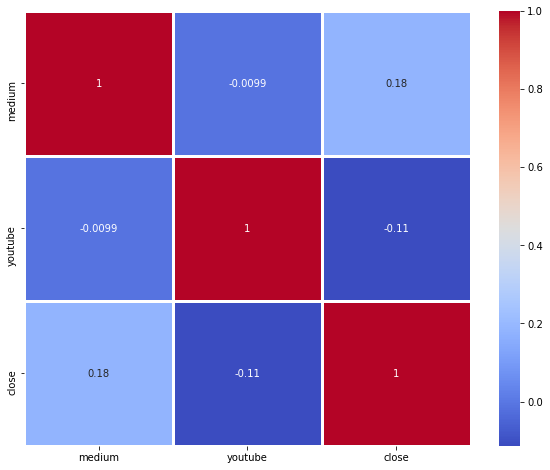

In [60]:
col = ['medium','youtube','close']
plt.figure(figsize=(10,8))
ax = sns.heatmap(df[col].corr(), cmap = "coolwarm", annot=True, linewidth=3)


In [61]:
df = df.drop(['medium','youtube'],axis=1)

In [62]:
df

,id,asset_id,open,high,low,volume,market_cap,url_shares,unique_url_shares,reddit_posts,...,volatility,market_cap_rank,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,social_score_24h_rank,social_volume,percent_change_24h,market_cap_global,close
0,ID_322qz6,1,9422.849081,9428.490628,9422.849081,7.131986e+08,1.737635e+11,1689.0,817.0,55.0,...,0.007118,1.0,606.0,2.0,1.0,1.0,4422,1.434516,2.818066e+11,9428.279323
1,ID_3239o9,1,7985.359278,7992.059917,7967.567267,4.004755e+08,1.426942e+11,920.0,544.0,20.0,...,0.009419,1.0,NaN,NaN,NaN,NaN,2159,-2.459507,2.126897e+11,7967.567267
2,ID_323J9k,1,49202.033778,49394.593518,49068.057046,3.017729e+09,9.166977e+11,1446.0,975.0,72.0,...,0.013530,1.0,692.0,3.0,1.0,1.0,10602,4.942448,1.530712e+12,49120.738484
3,ID_323y5P,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,285,NaN,NaN,NaN
4,ID_324kJH,1,10535.737119,10535.737119,10384.798216,1.150053e+09,1.921183e+11,1012.0,638.0,24.0,...,0.010332,1.0,749.0,2.0,1.0,1.0,3996,2.609576,3.386925e+11,10384.798216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12627,ID_zybd4H,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN
12628,ID_zydeys,1,7294.506136,7306.701928,7292.729876,3.816704e+08,1.322473e+11,605.0,462.0,16.0,...,0.019912,1.0,1007.0,2.0,1.0,1.0,2020,NaN,1.978198e+11,7303.640282
12629,ID_zyfj4W,1,8811.121632,8832.560173,8754.602574,2.412260e+09,1.621298e+11,1653.0,757.0,74.0,...,0.020715,1.0,918.0,2.0,1.0,1.0,5787,NaN,2.493421e+11,8828.440234
12630,ID_zz5eGB,1,9661.514681,9662.196605,9645.133934,9.861517e+08,1.774933e+11,1376.0,657.0,39.0,...,0.012411,1.0,603.0,2.0,1.0,1.0,4679,2.706432,2.757547e+11,9658.204385


In [63]:
col = ['url_shares','unique_url_shares','reddit_posts','reddit_posts_score'
,'reddit_comments','reddit_comments_score','tweets','tweet_spam','tweet_followers'
,'tweet_quotes','tweet_retweets','tweet_replies','tweet_favorites','tweet_sentiment1',
'tweet_sentiment2','tweet_sentiment3','tweet_sentiment4','tweet_sentiment5',               
'tweet_sentiment_impact1','tweet_sentiment_impact2','tweet_sentiment_impact3',
'tweet_sentiment_impact4','tweet_sentiment_impact5','social_score', 'average_sentiment',
'news','price_score','social_impact_score','correlation_rank','galaxy_score']
col

['url_shares',
 'unique_url_shares',
 'reddit_posts',
 'reddit_posts_score',
 'reddit_comments',
 'reddit_comments_score',
 'tweets',
 'tweet_spam',
 'tweet_followers',
 'tweet_quotes',
 'tweet_retweets',
 'tweet_replies',
 'tweet_favorites',
 'tweet_sentiment1',
 'tweet_sentiment2',
 'tweet_sentiment3',
 'tweet_sentiment4',
 'tweet_sentiment5',
 'tweet_sentiment_impact1',
 'tweet_sentiment_impact2',
 'tweet_sentiment_impact3',
 'tweet_sentiment_impact4',
 'tweet_sentiment_impact5',
 'social_score',
 'average_sentiment',
 'news',
 'price_score',
 'social_impact_score',
 'correlation_rank',
 'galaxy_score']

In [64]:
df[col] = df[col].replace(np.nan,0)

In [65]:
df

,id,asset_id,open,high,low,volume,market_cap,url_shares,unique_url_shares,reddit_posts,...,volatility,market_cap_rank,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,social_score_24h_rank,social_volume,percent_change_24h,market_cap_global,close
0,ID_322qz6,1,9422.849081,9428.490628,9422.849081,7.131986e+08,1.737635e+11,1689.0,817.0,55.0,...,0.007118,1.0,606.0,2.0,1.0,1.0,4422,1.434516,2.818066e+11,9428.279323
1,ID_3239o9,1,7985.359278,7992.059917,7967.567267,4.004755e+08,1.426942e+11,920.0,544.0,20.0,...,0.009419,1.0,NaN,NaN,NaN,NaN,2159,-2.459507,2.126897e+11,7967.567267
2,ID_323J9k,1,49202.033778,49394.593518,49068.057046,3.017729e+09,9.166977e+11,1446.0,975.0,72.0,...,0.013530,1.0,692.0,3.0,1.0,1.0,10602,4.942448,1.530712e+12,49120.738484
3,ID_323y5P,1,NaN,NaN,NaN,NaN,NaN,0.0,0.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,285,NaN,NaN,NaN
4,ID_324kJH,1,10535.737119,10535.737119,10384.798216,1.150053e+09,1.921183e+11,1012.0,638.0,24.0,...,0.010332,1.0,749.0,2.0,1.0,1.0,3996,2.609576,3.386925e+11,10384.798216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12627,ID_zybd4H,1,NaN,NaN,NaN,NaN,NaN,0.0,0.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN
12628,ID_zydeys,1,7294.506136,7306.701928,7292.729876,3.816704e+08,1.322473e+11,605.0,462.0,16.0,...,0.019912,1.0,1007.0,2.0,1.0,1.0,2020,NaN,1.978198e+11,7303.640282
12629,ID_zyfj4W,1,8811.121632,8832.560173,8754.602574,2.412260e+09,1.621298e+11,1653.0,757.0,74.0,...,0.020715,1.0,918.0,2.0,1.0,1.0,5787,NaN,2.493421e+11,8828.440234
12630,ID_zz5eGB,1,9661.514681,9662.196605,9645.133934,9.861517e+08,1.774933e+11,1376.0,657.0,39.0,...,0.012411,1.0,603.0,2.0,1.0,1.0,4679,2.706432,2.757547e+11,9658.204385


In [66]:
df.isnull().sum()

id                            0
asset_id                      0
open                       4015
high                       4015
low                        4015
volume                     4027
market_cap                 4253
url_shares                    0
unique_url_shares             0
reddit_posts                  0
reddit_posts_score            0
reddit_comments               0
reddit_comments_score         0
tweets                        0
tweet_spam                    0
tweet_followers               0
tweet_quotes                  0
tweet_retweets                0
tweet_replies                 0
tweet_favorites               0
tweet_sentiment1              0
tweet_sentiment2              0
tweet_sentiment3              0
tweet_sentiment4              0
tweet_sentiment5              0
tweet_sentiment_impact1       0
tweet_sentiment_impact2       0
tweet_sentiment_impact3       0
tweet_sentiment_impact4       0
tweet_sentiment_impact5       0
social_score                  0
average_

In [67]:
df['close'] = df['close'].replace(np.nan,0)

In [68]:
df.isnull().sum()

id                            0
asset_id                      0
open                       4015
high                       4015
low                        4015
volume                     4027
market_cap                 4253
url_shares                    0
unique_url_shares             0
reddit_posts                  0
reddit_posts_score            0
reddit_comments               0
reddit_comments_score         0
tweets                        0
tweet_spam                    0
tweet_followers               0
tweet_quotes                  0
tweet_retweets                0
tweet_replies                 0
tweet_favorites               0
tweet_sentiment1              0
tweet_sentiment2              0
tweet_sentiment3              0
tweet_sentiment4              0
tweet_sentiment5              0
tweet_sentiment_impact1       0
tweet_sentiment_impact2       0
tweet_sentiment_impact3       0
tweet_sentiment_impact4       0
tweet_sentiment_impact5       0
social_score                  0
average_

In [69]:
df =df.fillna(df.mean())

In [70]:
df.isnull().sum()

id                         0
asset_id                   0
open                       0
high                       0
low                        0
volume                     0
market_cap                 0
url_shares                 0
unique_url_shares          0
reddit_posts               0
reddit_posts_score         0
reddit_comments            0
reddit_comments_score      0
tweets                     0
tweet_spam                 0
tweet_followers            0
tweet_quotes               0
tweet_retweets             0
tweet_replies              0
tweet_favorites            0
tweet_sentiment1           0
tweet_sentiment2           0
tweet_sentiment3           0
tweet_sentiment4           0
tweet_sentiment5           0
tweet_sentiment_impact1    0
tweet_sentiment_impact2    0
tweet_sentiment_impact3    0
tweet_sentiment_impact4    0
tweet_sentiment_impact5    0
social_score               0
average_sentiment          0
news                       0
price_score                0
social_impact_

In [72]:
y= df['close']
x = df.drop(['close','id','asset_id'],axis=1)

In [75]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
from sklearn.model_selection import RandomizedSearchCV

In [76]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt'] 
#Haximum number of Levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num= 6)] 
#max_depth.append(None) #Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
#Minimum number of samples required at each teaf node
min_samples_leaf = [1, 2, 5, 10]

In [77]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features, 
               'max_depth': max_depth,
               'min_samples_split': min_samples_split, 
               'min_samples_leaf': min_samples_leaf}

print (random_grid)


{'n_estimators': [100, 222, 344, 466, 588, 711, 833, 955, 1077, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [80]:
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, scoring='neg_mean_squared_error', n_iter=2, cv=5, verbose=2, random_state=42, n_jobs=1)

In [81]:
rf_random.fit(x, y)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=  11.9s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=  11.6s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=  11.5s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=  11.8s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=  12.3s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=588; total time=  49.6s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=588; total time=  49.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=2, n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 222, 344, 466,
                                                         588, 711, 833, 955,
                                                         1077, 1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [82]:
y_pred=rf_random.predict(x)
y_pred

array([ 9427.28919463,  7974.59341552, 49138.48898006, ...,
        8828.73405403,  9654.45232673, 11810.7245037 ])

In [84]:
from sklearn.metrics import r2_score, mean_squared_error
r2score = r2_score(y, y_pred)
r2score

0.9999964623114199

In [86]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y, y_pred)

8.7732943589287

In [95]:
test = pd.read_csv("/home/ayush/Documents/Test.csv")
test

,id,asset_id,open,high,low,volume,market_cap,url_shares,unique_url_shares,reddit_posts,...,market_cap_rank,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,social_score_24h_rank,medium,youtube,social_volume,percent_change_24h,market_cap_global
0,ID_323Sn2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN
1,ID_325SNW,1,11335.062188,11351.690956,11335.062188,1.064152e+09,2.101463e+11,1664.0,1045.0,64.0,...,1.0,711.0,2.0,1.0,1.0,1.0,1.0,7245,-0.555698,3.631052e+11
2,ID_325uzE,1,6322.560756,6328.362354,6294.714484,1.516268e+09,1.153862e+11,397.0,255.0,11.0,...,1.0,715.0,2.0,1.0,1.0,NaN,NaN,2702,1.689370,1.771075e+11
3,ID_328qCx,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,225,NaN,NaN
4,ID_3293uJ,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6217,ID_zufSPk,1,8266.942912,8266.942912,8259.796103,3.100637e+08,1.491229e+11,618.0,438.0,15.0,...,1.0,921.0,2.0,1.0,1.0,NaN,NaN,1494,-0.967973,2.262125e+11
6218,ID_zuz9yf,1,10869.612767,10873.493490,10865.827625,6.989360e+08,2.011601e+11,1608.0,911.0,84.0,...,1.0,807.0,2.0,1.0,1.0,NaN,6.0,7065,NaN,3.523272e+11
6219,ID_zvrMSX,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,175,NaN,NaN
6220,ID_zy9Cfv,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN,NaN


In [96]:
col = ['url_shares','unique_url_shares','reddit_posts','reddit_posts_score'
,'reddit_comments','reddit_comments_score','tweets','tweet_spam','tweet_followers'
,'tweet_quotes','tweet_retweets','tweet_replies','tweet_favorites','tweet_sentiment1',
'tweet_sentiment2','tweet_sentiment3','tweet_sentiment4','tweet_sentiment5',               
'tweet_sentiment_impact1','tweet_sentiment_impact2','tweet_sentiment_impact3',
'tweet_sentiment_impact4','tweet_sentiment_impact5','social_score', 'average_sentiment',
'news','price_score','social_impact_score','correlation_rank','galaxy_score']
col

['url_shares',
 'unique_url_shares',
 'reddit_posts',
 'reddit_posts_score',
 'reddit_comments',
 'reddit_comments_score',
 'tweets',
 'tweet_spam',
 'tweet_followers',
 'tweet_quotes',
 'tweet_retweets',
 'tweet_replies',
 'tweet_favorites',
 'tweet_sentiment1',
 'tweet_sentiment2',
 'tweet_sentiment3',
 'tweet_sentiment4',
 'tweet_sentiment5',
 'tweet_sentiment_impact1',
 'tweet_sentiment_impact2',
 'tweet_sentiment_impact3',
 'tweet_sentiment_impact4',
 'tweet_sentiment_impact5',
 'social_score',
 'average_sentiment',
 'news',
 'price_score',
 'social_impact_score',
 'correlation_rank',
 'galaxy_score']

In [97]:
test[col] = test[col].replace(np.nan,0)
test

,id,asset_id,open,high,low,volume,market_cap,url_shares,unique_url_shares,reddit_posts,...,market_cap_rank,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,social_score_24h_rank,medium,youtube,social_volume,percent_change_24h,market_cap_global
0,ID_323Sn2,1,NaN,NaN,NaN,NaN,NaN,0.0,0.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN
1,ID_325SNW,1,11335.062188,11351.690956,11335.062188,1.064152e+09,2.101463e+11,1664.0,1045.0,64.0,...,1.0,711.0,2.0,1.0,1.0,1.0,1.0,7245,-0.555698,3.631052e+11
2,ID_325uzE,1,6322.560756,6328.362354,6294.714484,1.516268e+09,1.153862e+11,397.0,255.0,11.0,...,1.0,715.0,2.0,1.0,1.0,NaN,NaN,2702,1.689370,1.771075e+11
3,ID_328qCx,1,NaN,NaN,NaN,NaN,NaN,0.0,0.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,225,NaN,NaN
4,ID_3293uJ,1,NaN,NaN,NaN,NaN,NaN,0.0,0.0,26.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6217,ID_zufSPk,1,8266.942912,8266.942912,8259.796103,3.100637e+08,1.491229e+11,618.0,438.0,15.0,...,1.0,921.0,2.0,1.0,1.0,NaN,NaN,1494,-0.967973,2.262125e+11
6218,ID_zuz9yf,1,10869.612767,10873.493490,10865.827625,6.989360e+08,2.011601e+11,1608.0,911.0,84.0,...,1.0,807.0,2.0,1.0,1.0,NaN,6.0,7065,NaN,3.523272e+11
6219,ID_zvrMSX,1,NaN,NaN,NaN,NaN,NaN,0.0,0.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,175,NaN,NaN
6220,ID_zy9Cfv,1,NaN,NaN,NaN,NaN,NaN,0.0,0.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN,NaN


In [98]:
test = test.drop(['medium','youtube'],axis=1)

In [99]:
id_col = test['id']

In [100]:
test =test.fillna(df.mean())

In [101]:
test.isnull().sum()

id                         0
asset_id                   0
open                       0
high                       0
low                        0
volume                     0
market_cap                 0
url_shares                 0
unique_url_shares          0
reddit_posts               0
reddit_posts_score         0
reddit_comments            0
reddit_comments_score      0
tweets                     0
tweet_spam                 0
tweet_followers            0
tweet_quotes               0
tweet_retweets             0
tweet_replies              0
tweet_favorites            0
tweet_sentiment1           0
tweet_sentiment2           0
tweet_sentiment3           0
tweet_sentiment4           0
tweet_sentiment5           0
tweet_sentiment_impact1    0
tweet_sentiment_impact2    0
tweet_sentiment_impact3    0
tweet_sentiment_impact4    0
tweet_sentiment_impact5    0
social_score               0
average_sentiment          0
news                       0
price_score                0
social_impact_

In [102]:
test = test.drop(['id','asset_id'],axis =1)
test

,open,high,low,volume,market_cap,url_shares,unique_url_shares,reddit_posts,reddit_posts_score,reddit_comments,...,galaxy_score,volatility,market_cap_rank,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,social_score_24h_rank,social_volume,percent_change_24h,market_cap_global
0,15504.816128,15559.484568,15449.591187,1.300724e+09,2.826010e+11,0.0,0.0,7.0,56.0,2.0,...,0.0,0.015378,1.001323,809.518811,2.128037,1.018749,1.005921,9,0.375253,4.616824e+11
1,11335.062188,11351.690956,11335.062188,1.064152e+09,2.101463e+11,1664.0,1045.0,64.0,213.0,51.0,...,65.5,0.004407,1.000000,711.000000,2.000000,1.000000,1.000000,7245,-0.555698,3.631052e+11
2,6322.560756,6328.362354,6294.714484,1.516268e+09,1.153862e+11,397.0,255.0,11.0,72.0,30.0,...,65.5,0.024035,1.000000,715.000000,2.000000,1.000000,1.000000,2702,1.689370,1.771075e+11
3,15504.816128,15559.484568,15449.591187,1.300724e+09,2.826010e+11,0.0,0.0,8.0,96.0,217.0,...,0.0,0.015378,1.001323,809.518811,2.128037,1.018749,1.005921,225,0.375253,4.616824e+11
4,15504.816128,15559.484568,15449.591187,1.300724e+09,2.826010e+11,0.0,0.0,26.0,49.0,33.0,...,0.0,0.015378,1.001323,809.518811,2.128037,1.018749,1.005921,59,0.375253,4.616824e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6217,8266.942912,8266.942912,8259.796103,3.100637e+08,1.491229e+11,618.0,438.0,15.0,202.0,42.0,...,61.5,0.007076,1.000000,921.000000,2.000000,1.000000,1.000000,1494,-0.967973,2.262125e+11
6218,10869.612767,10873.493490,10865.827625,6.989360e+08,2.011601e+11,1608.0,911.0,84.0,204.0,45.0,...,67.5,0.005486,1.000000,807.000000,2.000000,1.000000,1.000000,7065,0.375253,3.523272e+11
6219,15504.816128,15559.484568,15449.591187,1.300724e+09,2.826010e+11,0.0,0.0,8.0,139.0,167.0,...,0.0,0.015378,1.001323,809.518811,2.128037,1.018749,1.005921,175,0.375253,4.616824e+11
6220,15504.816128,15559.484568,15449.591187,1.300724e+09,2.826010e+11,0.0,0.0,6.0,85.0,0.0,...,0.0,0.015378,1.001323,809.518811,2.128037,1.018749,1.005921,6,0.375253,4.616824e+11


In [112]:
y_pred=rf_random.predict(test)
y_pred

array([    0.        , 11352.6898747 ,  6318.30624045, ...,
           0.        ,     0.        ,  7060.58342514])

In [115]:
sub = pd.DataFrame({'id':id_col,'close':y_pred}) 

In [116]:
sub.to_csv('submission.csv', index=False, encoding='utf-8')

In [117]:
sub

,id,close
0,ID_323Sn2,0.000000
1,ID_325SNW,11352.689875
2,ID_325uzE,6318.306240
3,ID_328qCx,0.000000
4,ID_3293uJ,0.000000
...,...,...
6217,ID_zufSPk,8274.008340
6218,ID_zuz9yf,10868.207964
6219,ID_zvrMSX,0.000000
6220,ID_zy9Cfv,0.000000
